In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


I want to see if nulls indicate a higher chance of being `transported`.  Unfortunately, matplotlib and seaborn don't play nicely with null information so I need to caputure it differently.

In [3]:
nulldf = pd.DataFrame()

for col in df:
    newcol = f"{col}_isna"
    df[newcol] = False
    df.loc[df[col].isna(), newcol] = True
    nulldf[newcol] = df.pop(newcol)

In [5]:
nulldf.pop('Transported_isna')
nulldf['Transported'] = df['Transported']
nulldf.head()

,PassengerId_isna,HomePlanet_isna,CryoSleep_isna,Cabin_isna,Destination_isna,Age_isna,VIP_isna,RoomService_isna,FoodCourt_isna,ShoppingMall_isna,Spa_isna,VRDeck_isna,Name_isna,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
y = df.Transported

x = nulldf.iloc[:, 1:-1]

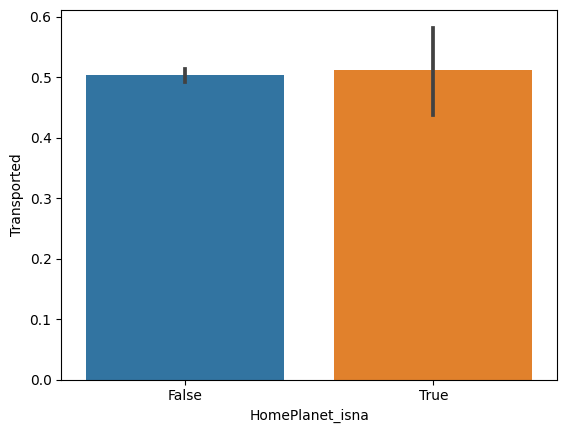

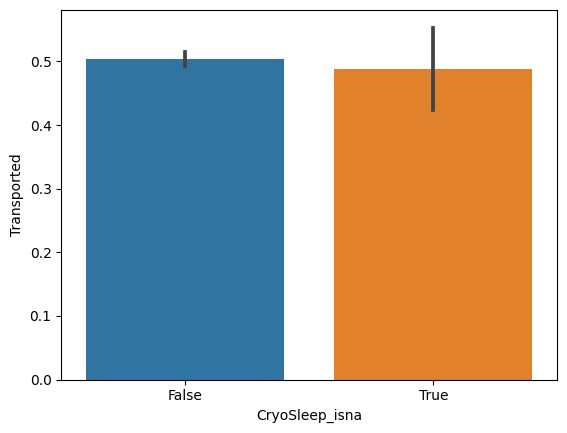

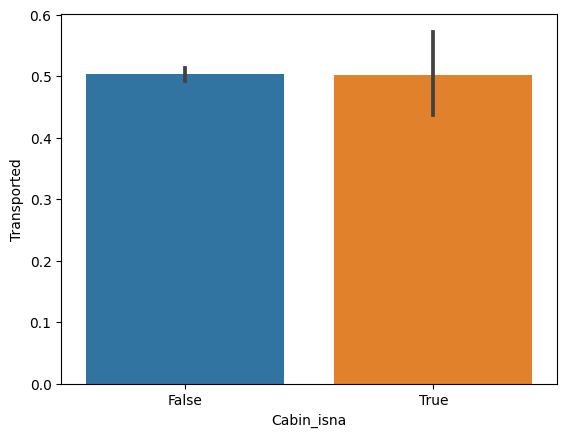

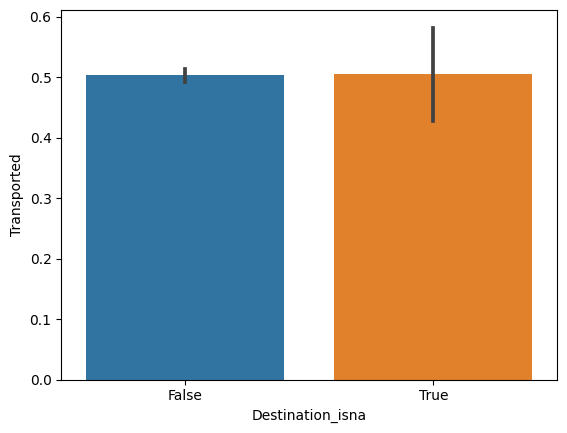

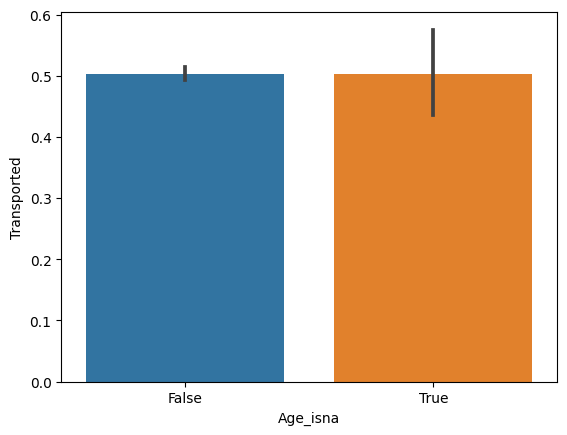

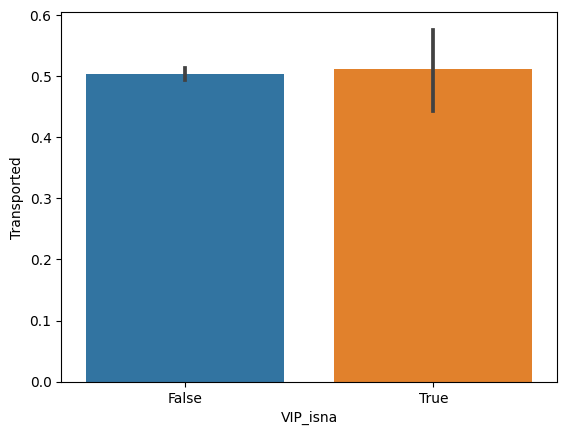

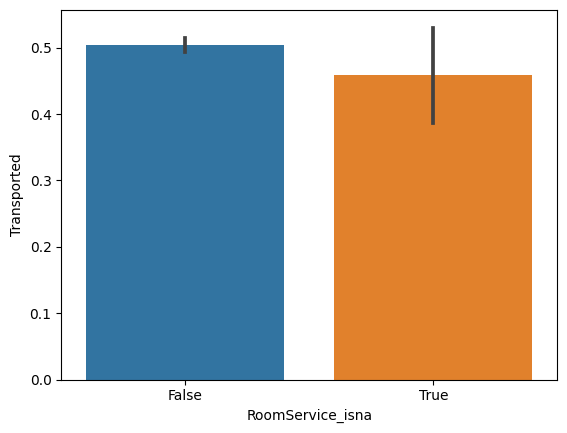

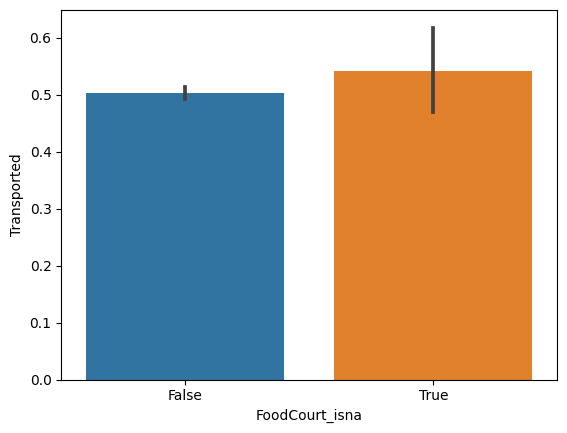

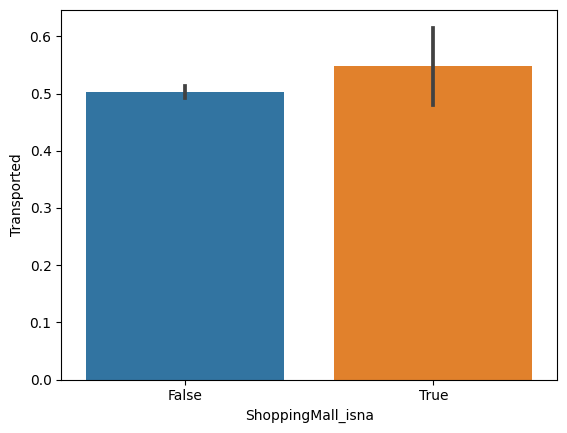

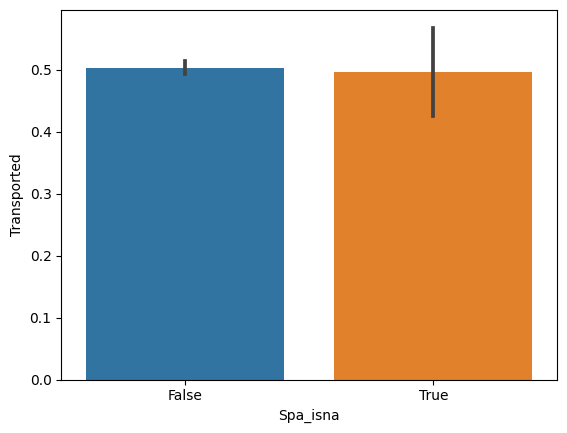

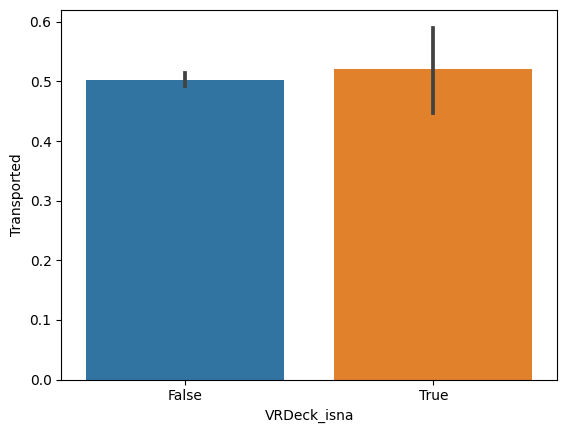

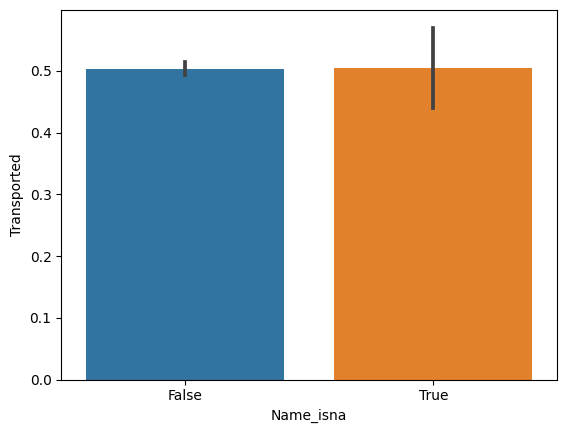

In [18]:
for col in x:
    sns.barplot(data=nulldf, x=col, y='Transported')
    plt.show()

There doesn't seem to be any predictive power here.